In [42]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fft

In [107]:
class Run():
    threshold_=0.01
    def __init__(self, file_name, offset, Vmax, trigger):
         #True=con waveforms, False=senza waveforms
         
         self.file_name=file_name
         self.offset=offset #offset oscilloscopio
         self.Vmax=Vmax #voltaggio dell'alta tensione
         self.trigger=trigger 

         self.file=uproot.open(self.file_name)
         self.tree=self.file['tree']
         self.branches=self.tree.arrays()
            
         self.baselines=np.array(self.branches['base']).ravel()
         self.charges=np.array(self.branches['charge']).ravel()
         self.amplitudes=np.array(self.branches['amp']).ravel()
         
    
    #elimina gli eventi a carica positiva dai parametri di wavecatcher
    def pre_filter(self):  
        threshold=0.
        saturation=-1.250
        index=np.logical_and(self.charges<=threshold, self.amplitudes>saturation)
        self.baselines=self.baselines[index]
        self.charges=self.charges[index]
        self.amplitudes=self.amplitudes[index]

    def charge_spectrum(self, bin_inp, density=False, lims=(-1000, 0)):
        bins, edges, _ = plt.hist(self.charges, bins=bin_inp, density=density, range=lims)
        plt.ylabel("counts")
        plt.xlabel("charge [pC]")
        return(bins, edges)

    def amplitude_spectrum(self):
        return 0
        
    


In [97]:
class Run_wave(Run):
    def __init__(self, file_name, offset, Vmax, trigger):
        super().__init__(file_name, offset, Vmax, trigger)
        self.waveforms=np.array(self.branches['pshape']).reshape((max(self.branches['ev']),1024)) 
        

    #calcola la media dei primi 16 elementi
    def baseline_measurement(self):
       i=0
       baseline=[]
       for i in range(len(self.branches['ev'])):
        baseline.append(np.mean(self.waveforms[i][:16]))
       return np.array(baseline)

    #calcola minimo-baseline  
    def amplitude_measurement(self):
       #amplitude=[]
       amplitude=[np.min(self.waveforms[i]) for i in range(max(self.branches['ev']))]
       return np.array(amplitude)-self.baseline_measurement()

    #integra dal primo quarto di divisione fino all'ultimo quarto   
    def charge_measurement(self):
        start=int(0.25*1024/16)
        stop=int(15.50*1024/16)
        charge=[np.trapz(self.waveforms[i][start:stop]-self.baselines[i]) for i in range(max(self.branches['ev']))]
        return np.array(charge)

100000
85262
-6154.341


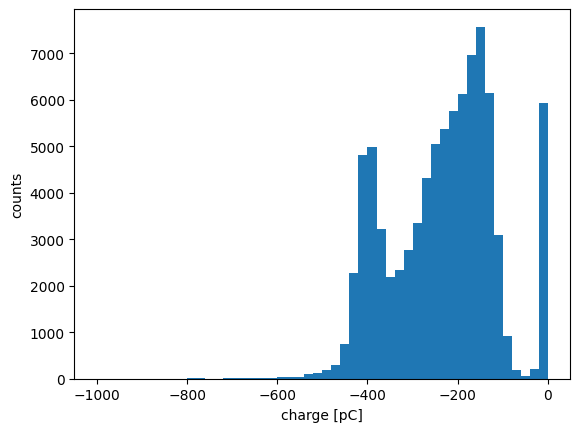

In [108]:
data=Run_wave("../Dati/Run_ch0_Data_3_14_2024_Ascii.root", 0, 1500, -0.03) 
data2=Run("../Dati/Run_ch2_Cs_Measurements_Only_3_21_2024.root", 0, 1800, -0.03 ) 
print(len(data2.baselines))
baseline_meas=data.baseline_measurement()
data2.pre_filter()
print(len(data2.baselines))

plt.fig()
data2.charge_spectrum(50, False)
plt.title()
print(np.min(data2.charges))



In [47]:
#data=Run("../Dati/Run_ch2_Cs_Measurements_Only_3_21_2024.root", 0, 1450, -0.03, measurements='MO' )   #../ sale sopra di una cartella
data=Run("../Dati/Run_ch0_Data_3_14_2024_Ascii.root", 0, 1500, -0.03)
threshold=0
saturation=-1.250
print(data.charges)
baselines_meas=data.baseline_measurement()
print()



[-348.971 -231.982 -299.858 ... -181.209 -232.421 -612.068]


AttributeError: 'Run' object has no attribute 'baseline_measurement'